In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data = df.iloc[:,1:5]

In [9]:
columns_name

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

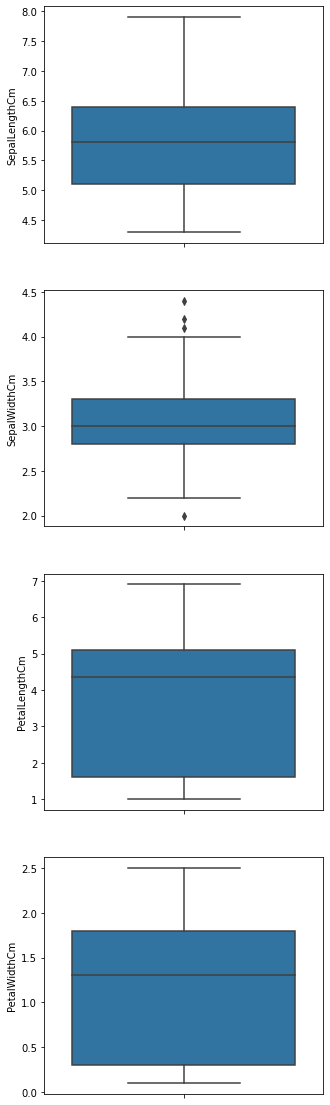

In [8]:
columns_name = data.columns
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(5, 20))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i], data=data)

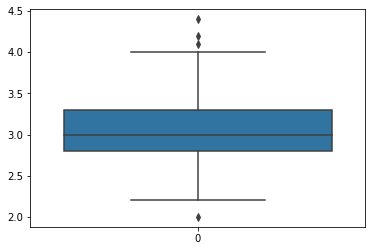

In [9]:
sns.boxplot(data=df.SepalWidthCm)
plt.show()

In [10]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)    
    return lower_range, upper_range

In [11]:
lower, upper = outlier_treatment(df.SepalWidthCm)
df.SepalWidthCm = np.clip(df.SepalWidthCm, a_min=lower, a_max=upper)

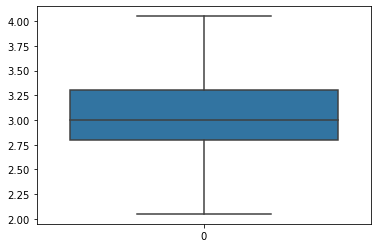

In [12]:
sns.boxplot(data=df.SepalWidthCm)
plt.show()

In [13]:
data = df.iloc[:,1:5]

In [14]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df.iloc[:,1:]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


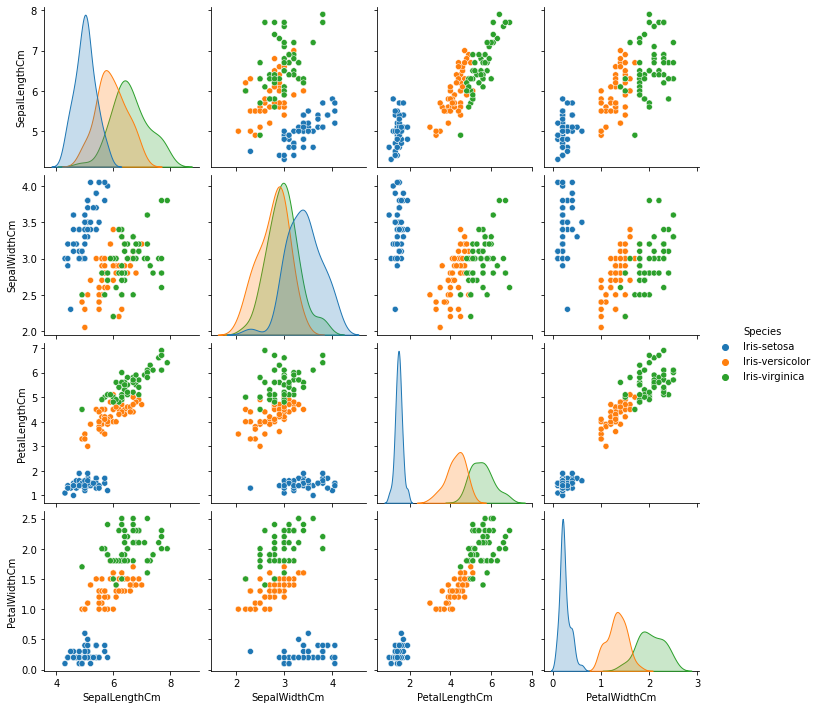

In [16]:
sns.pairplot(df.iloc[:,1:], hue='Species')
plt.show()

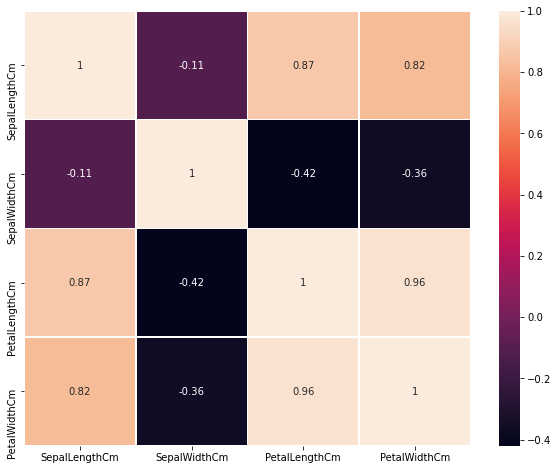

In [17]:
corr=df.iloc[:,1:].corr()
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)
plt.show()

In [18]:
X = df.iloc[:, 1:5].values
X

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [5.  , 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.4 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.8 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.05, 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.1 , 3.8 , 1.5 , 0.3 ],
       [5.4 , 3.4 , 1.7 , 0.2 ],
       [5.1 , 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.  , 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

In [19]:
cols = []
for col in data.columns:
    cols.append(col)
    
from sklearn.preprocessing import StandardScaler

SS = StandardScaler().fit_transform(X)
data = pd.DataFrame(SS, columns=cols)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


In [20]:
data_one = data.iloc[:,0:2]

pca = PCA(n_components = 1)
data_one_pca = pca.fit_transform(data_one)

explained_variance = pca.explained_variance_ratio_

In [21]:
explained_variance

array([0.55517138])

In [22]:
data_two = data.iloc[:,2:]
data_two_pca = pca.fit_transform(data_two)

explained_variance = pca.explained_variance_ratio_

In [23]:
explained_variance

array([0.98137855])

In [24]:
new_data = np.concatenate((data_one_pca, data_two_pca), axis=1)
new_data

array([[-1.39045716, -1.87683756],
       [-0.72326166, -1.87683756],
       [-1.23004001, -1.91704769],
       [-1.14800808, -1.83662744],
       [-1.64384634, -1.87683756],
       [-1.80426349, -1.57027633],
       [-1.65113973, -1.78387213],
       [-1.30842524, -1.83662744],
       [-0.98394423, -1.87683756],
       [-0.89097221, -1.92959286],
       [-1.46884239, -1.83662744],
       [-1.47978248, -1.79641731],
       [-0.80894029, -1.96980299],
       [-1.2373334 , -2.09043336],
       [-1.62925955, -1.95725781],
       [-1.79879345, -1.65069658],
       [-1.80426349, -1.73111683],
       [-1.39045716, -1.78387213],
       [-1.37951707, -1.66324176],
       [-1.89358881, -1.74366201],
       [-0.96571075, -1.75620719],
       [-1.72587826, -1.65069658],
       [-1.98656083, -2.03767806],
       [-1.05503607, -1.4773109 ],
       [-1.47978248, -1.67578694],
       [-0.63758304, -1.79641731],
       [-1.30842524, -1.61048645],
       [-1.30477854, -1.83662744],
       [-1.13706799,

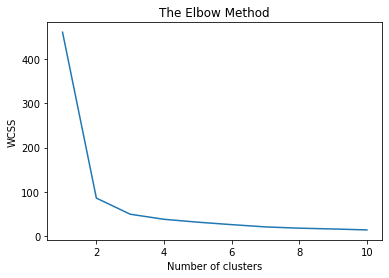

In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(new_data)
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7275974542753688
For n_clusters = 3 The average silhouette_score is : 0.5532854958855328
For n_clusters = 4 The average silhouette_score is : 0.5475437395022474
For n_clusters = 5 The average silhouette_score is : 0.5261128562340665
For n_clusters = 6 The average silhouette_score is : 0.41639397744276085
For n_clusters = 7 The average silhouette_score is : 0.41856200619211203
For n_clusters = 8 The average silhouette_score is : 0.41159568472517083


# K-means Clustering

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_data)

In [28]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
kmeans.cluster_centers_

array([[ 0.79030705,  1.5066947 ],
       [-1.31502426, -1.81019829],
       [ 0.52992485,  0.32709558]])

In [30]:
df.iloc[:,5].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
df['cluster_km'] = y_kmeans
df.set_index("Species", inplace = True)

In [32]:
# df[df['cluster_km'] == 1]

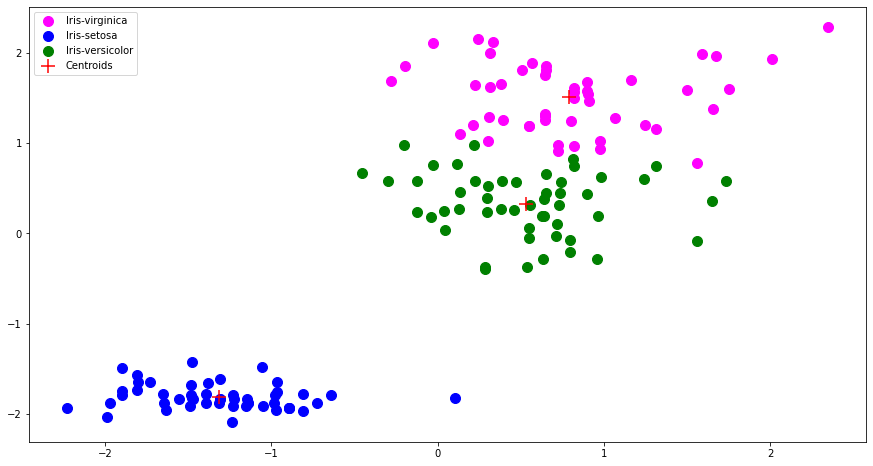

In [33]:
fig = plt.figure(figsize = (15,8))
plt.scatter(new_data[y_kmeans==0,0],new_data[y_kmeans==0,1],s=100,c='magenta',label='Iris-virginica')
plt.scatter(new_data[y_kmeans==1,0],new_data[y_kmeans==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(new_data[y_kmeans==2,0],new_data[y_kmeans==2,1],s=100,c='green',label='Iris-versicolor')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200, c='red', label='Centroids', marker = "+")

plt.legend()
plt.show()

# Hierarchical Clustering

In [34]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

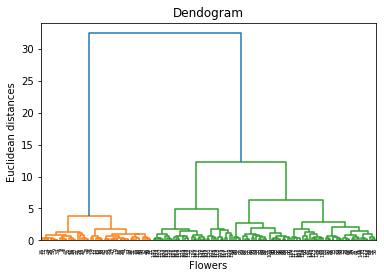

In [35]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean distances')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(new_data)

In [37]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
df['cluster_hc'] = y_hc

In [39]:
pd.set_option('display.max_rows', 500)
# df[df['cluster_hc'] == 0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_km,cluster_hc
Species,,,,,,,
Iris-versicolor,53,6.9,3.1,4.9,1.5,2,0
Iris-versicolor,78,6.7,3.0,5.0,1.7,0,0
Iris-versicolor,84,6.0,2.7,5.1,1.6,0,0
Iris-virginica,101,6.3,3.3,6.0,2.5,0,0
Iris-virginica,102,5.8,2.7,5.1,1.9,0,0
Iris-virginica,103,7.1,3.0,5.9,2.1,0,0
Iris-virginica,104,6.3,2.9,5.6,1.8,0,0
Iris-virginica,105,6.5,3.0,5.8,2.2,0,0
Iris-virginica,106,7.6,3.0,6.6,2.1,0,0


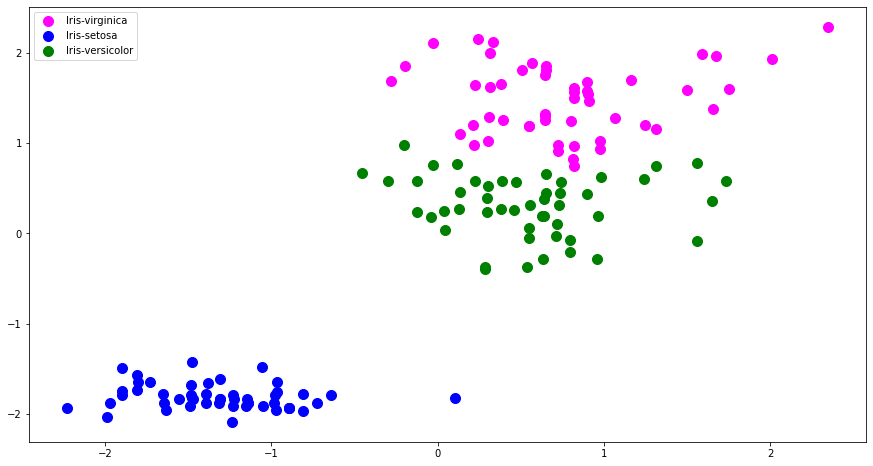

In [40]:
fig = plt.figure(figsize = (15,8))
plt.scatter(new_data[y_hc==0,0],new_data[y_hc==0,1],s=100,c='magenta',label='Iris-virginica')
plt.scatter(new_data[y_hc==1,0],new_data[y_hc==1,1],s=100,c='blue',label='Iris-setosa')
plt.scatter(new_data[y_hc==2,0],new_data[y_hc==2,1],s=100,c='green',label='Iris-versicolor')


plt.legend()
plt.ioff()
plt.show()